# Section 1 - Aspects of Real Quantum Computers

Please execute the following cell so that you have all imports that are needed often in this tutorial.

In [1]:
from qiskit.visualization import *
from qiskit.quantum_info import Statevector, Operator, random_unitary
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, transpile, circuit
from qiskit.qasm3 import dump
from qiskit.providers.basic_provider import BasicProvider
from qiskit_ibm_runtime.fake_provider import FakeSherbrooke
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit_ibm_runtime import SamplerV2 as Sampler
from qiskit_aer import AerSimulator, noise
from qiskit_ibm_runtime.fake_provider import FakeSherbrooke
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

***

## Execise 1

The connectivity of two-qubit gates in superconducting quantum computers is limited. To explore the effects of this limited connectivity, we investigate the resulting circuits.

1. Write a quantum program for 6 qubits that performs a chain of CNOT gates and get it's circuit depth.

> qc.cx(0,1);qc.cx(1,2);qc.cx(2,3);qc.cx(3,4);qc.cx(4,5);

2. Transpile the quantum program for a quantum computer with 6 qubits. The basis gates, i.e., the gates natively supported by the quantum computer should be the basis gates of the IBM Sherbrooke quantum computer and the connectivity of the two-qubit dates should be linear, i.e.,

> coupling_map=[[0,1],[1,2],[2,3],[3,4],[4,5]]

Hint: You can find the list of the basis gates as well as other information on an IBM quantum computer conveniently in the IBM quantum composer at https://quantum.ibm.com/composer/ when you click on "Setup and run".

Hint: have a look at the documentation of the `transpile` function (https://docs.quantum.ibm.com/api/qiskit/compiler#qiskit.compiler.transpile) on how to specify the basis gates and the coupling map.

Plot the transpired circuit and get it's circuit depth.

3. Now add an additional CNOT gate between the first and last qubit. Transpile the circuit, draw it and get it's circuit depth. What do you observe and why?

4. Now transpile the circuit for a quantum computer with the same basis gates but with a ring-connectivity. Draw the resulting circuit and get the circuit depth. What do you observe and why?

In [2]:
#write your python code here

In [3]:
#Solution for Task 1
qc = QuantumCircuit(6)
qc.cx(0,1);qc.cx(1,2);qc.cx(2,3);qc.cx(3,4);qc.cx(4,5);

qc.depth()

5

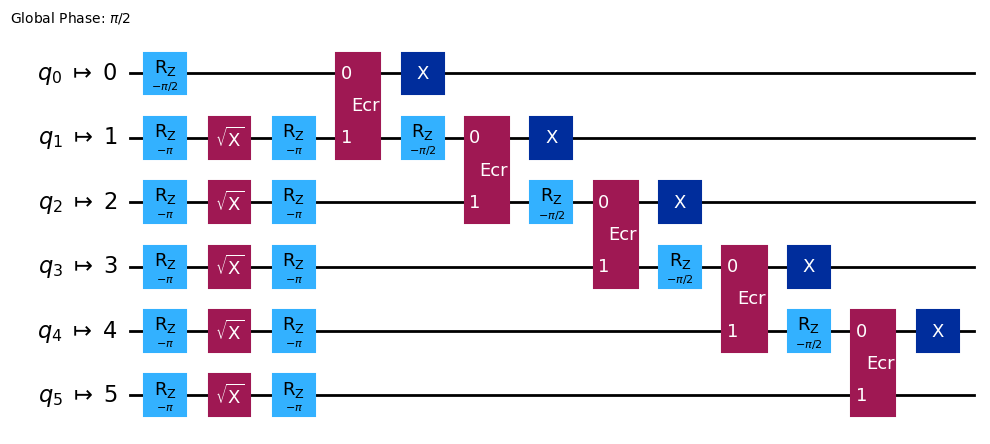

In [4]:
#Solution for task 2
qc2 = transpile(qc, basis_gates=['ecr','id','rz','sx','x'],coupling_map=[[0,1],[1,2],[2,3],[3,4],[4,5]])
qc2.draw('mpl')

In [5]:
qc2.depth()

13

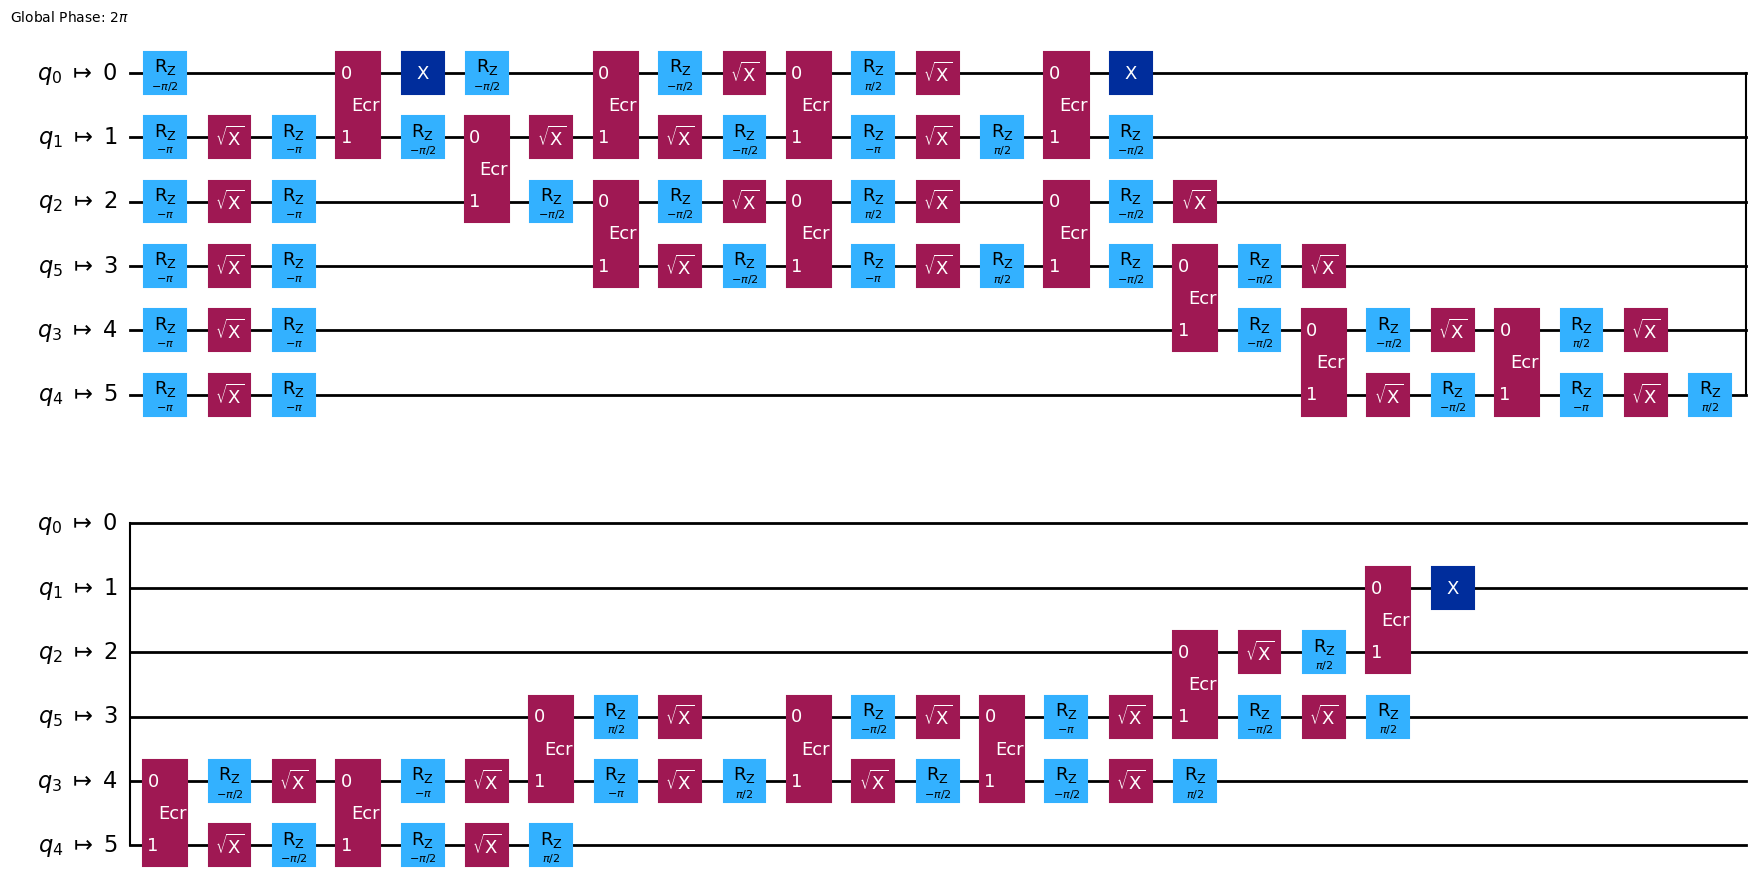

In [6]:
#Solution for task 3
qc = QuantumCircuit(6)
qc.cx(0,1);qc.cx(1,2);qc.cx(2,3);qc.cx(3,4);qc.cx(4,5);qc.cx(0,5);
qc2 = transpile(qc, basis_gates=['ecr','id','rz','sx','x'],coupling_map=[[0,1],[1,2],[2,3],[3,4],[4,5]])
qc2.draw('mpl')

In [7]:
qc2.depth()
#The resulting circuit depth is much higher in the case with the additional CNOT gate because the CNOT between the first and last qubit is not natively supported and must be emulated.

46

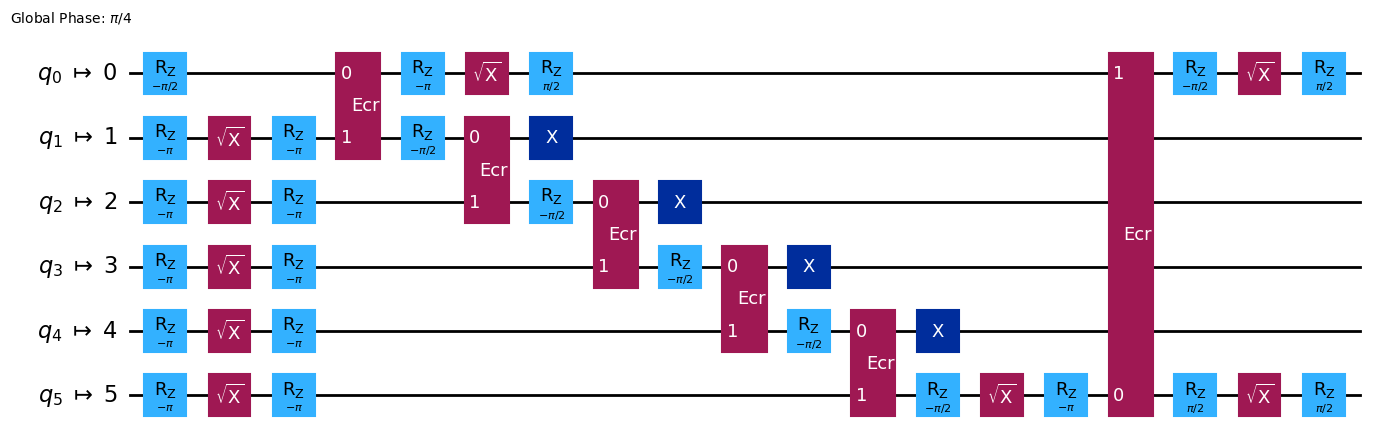

In [8]:
#Solution for task 4
qc = QuantumCircuit(6)
qc.cx(0,1);qc.cx(1,2);qc.cx(2,3);qc.cx(3,4);qc.cx(4,5);qc.cx(0,5);
qc2 = transpile(qc, basis_gates=['ecr','id','rz','sx','x'],coupling_map=[[0,1],[1,2],[2,3],[3,4],[4,5],[5,0]])
qc2.draw('mpl')

In [9]:
qc2.depth()
#The resulting circuit depth is much lower then in the case of a quantum computer with a linear connectivity because the CNOT between the first and last qubit is now natively supported.

19

---

## Exercise 2

We now perform a simulation of quantum circuits including noise models to approximate the results from an execution on a real quantum computer. Noise models are very helpful for constructing, optimizing, and debugging quantum circuits before one tries to run them on a real quantum computer.

Noise models can be obtained in two ways:

1. Use a noise model that is distributed with Qiskit. This is usually sufficient to study the general effect of noise on the circuit.

```
noise_model = noise.NoiseModel.from_backend(FakeSherbrooke())

# Create noisy simulator backend
sim_noise = AerSimulator(noise_model=noise_model)

# Transpile circuit for noisy basis gates
qc_noise = transpile(qc, sim_noise)

# Run and get counts
result = sim_noise.run(qc_noise).result()
counts=result.get_counts(0)

# Plot noisy output
plot_histogram(counts)
```

2. Or obtain the current noise model of a real quantum computer via the IBM Quantum API. Such a noise model should be used in preparation of running the circuit on the real qauntum computer. For accessing the current noise model an IBM quantum account and an API token is required. You can get an account for free by visiting https://quantum.ibm.com/ and either creating/using an IBMid or using an existing Google/Github/Linkedin account. Once you have logged in you can create an API token at https://quantum.ibm.com/account.

```
QiskitRuntimeService.save_account(channel="ibm_quantum", token="FILL YOUR TOKEN here")
service = QiskitRuntimeService(channel="ibm_quantum")

real_qc_backend = service.backend("ibm_sherbrooke")
noise_model = noise.NoiseModel.from_backend(real_qc_backend)

# Create noisy simulator backend
sim_noise = AerSimulator(noise_model=noise_model)

# Transpile circuit for noisy basis gates
qc_noise = transpile(qc, sim_noise)

# Run and get counts
result = sim_noise.run(qc_noise).result()
counts=result.get_counts(0)

# Plot noisy output
plot_histogram(counts)

```


1. Execute the linear CNOT circuit

> qc.h(0);qc.cx(0,1);qc.cx(1,2);qc.cx(2,3);qc.cx(3,4);qc.cx(4,5)

with the basic_simulator backend (without a noise model) and plot the histogram of measurements

2. Run the same circuit with the noise model of the FakeSherbrooke-backend. Which differences do you observe compared to the histogram of the first task?

3. Run the same circuit with the current noise model of the IBM Sherbrooke quantum computer. Compare to the histograms from task 1 and task 2.

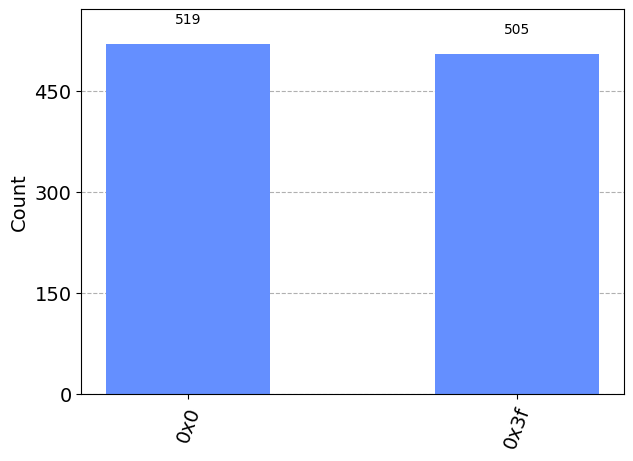

In [10]:
#Solution for Task 1
qc = QuantumCircuit(6)
qc.h(0);qc.cx(0,1);qc.cx(1,2);qc.cx(2,3);qc.cx(3,4);qc.cx(4,5)
qc.measure_all()

backend = BasicProvider().get_backend('basic_simulator')
new_circuit = transpile(qc, backend)
job = backend.run(new_circuit)
counts=job.result().results[0].data.counts
plot_histogram(counts)

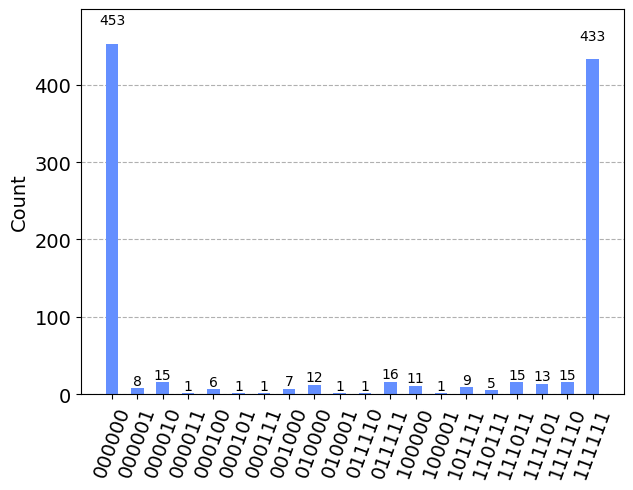

In [11]:
#Solution for Task 2
qc = QuantumCircuit(6)
qc.h(0);qc.cx(0,1);qc.cx(1,2);qc.cx(2,3);qc.cx(3,4);qc.cx(4,5)
qc.measure_all()

backend = FakeSherbrooke()
noise_model = noise.NoiseModel.from_backend(backend)
sim_noise = AerSimulator(noise_model=noise.NoiseModel.from_backend(backend),coupling_map=backend.coupling_map,basis_gates=noise_model.basis_gates)

# Create noisy simulator backend
sim_noise = AerSimulator(noise_model=noise_model)

# Transpile circuit for noisy basis gates
qc_tnoise = transpile(qc, sim_noise)

# Run and get counts
result = sim_noise.run(qc_tnoise).result()
counts=result.get_counts(0)

# Plot noisy output
plot_histogram(counts)

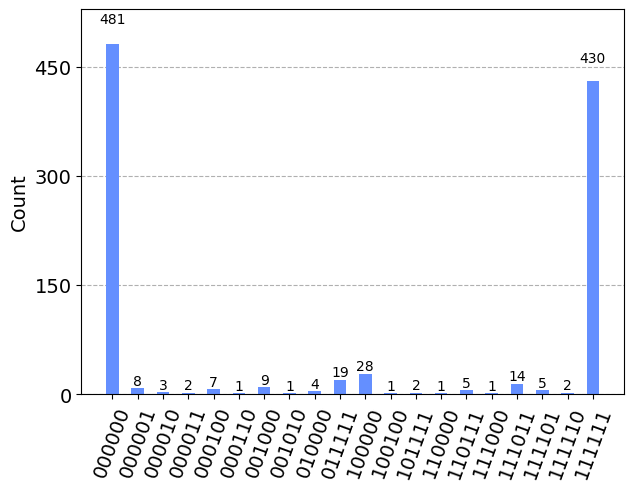

In [12]:
#Solution for Task 3
qc = QuantumCircuit(6)
qc.h(0);qc.cx(0,1);qc.cx(1,2);qc.cx(2,3);qc.cx(3,4);qc.cx(4,5)
qc.measure_all()

service = QiskitRuntimeService(channel="ibm_quantum")
real_qc_backend = service.backend("ibm_sherbrooke")
noise_model = noise.NoiseModel.from_backend(real_qc_backend)

# Create noisy simulator backend
sim_noise = AerSimulator(noise_model=noise.NoiseModel.from_backend(real_qc_backend),coupling_map=real_qc_backend.coupling_map,basis_gates=noise_model.basis_gates)

# Transpile circuit for noisy basis gates
qc_tnoise = transpile(qc, sim_noise)

# Run and get counts
result = sim_noise.run(qc_tnoise).result()
counts=result.get_counts(0)

# Plot noisy output
plot_histogram(counts)

---

## Exercise 3

Randomized benchmarking is a useful protocol to measure and characterize a quantum computer. Essentially random circuits are generated and then the result is compared to the exact result.

We will build here a simplified version of randomized benchmarking with the following steps:

1. Write a Python code that randomly selects gates for two qubits from the native gate set of the IBM Sherbrooke quantum computer. The parameters of the gates should also be chosen randomly.

2. Simulate the measurements of the circuits without and with a noise model. 

3. Create a simple error measure like a mean squared error by comparing the resulting distributions of measurements.

4. Compute the error measure for different depths of random quantum programs and plot the relationship between the error measure and the circuit depth.

5. What do you observe in the relationship between the error measure and the circuit depth? Up to which circuit depth can you expect reasonable results from the quantum computer?

Hint: The resulting graph will likely be not very smooth. If you average over multiple random circuits instead of just one random circuit per circuit depth, you can make the graph smoother.

In [13]:
#write your python code here

In [14]:
import random
import math
nq=2
navg=20

err={}
for nops in [1,2,3,4,5,6,7,8,9,10,20,30,40,50,60,70,80,90,100,200,300,400,500,600,700,800,900,1000,2000,3000,4000,5000,6000,7000,8000,9000,10000]:
    s=0
    for iavg in range(navg):
        qc = QuantumCircuit(nq)
        for i in range(nops):
            r=random.randint(0,3)
            if r==0:
                qc.rz(random.random()*2*math.pi,random.randint(0,nq-1))
            elif r==1:
                qc.sx(random.randint(0,nq-1))
            elif r==2:
                qc.s(random.randint(0,nq-1))
            elif r==3:
                a=random.randint(0,nq-1)
                b=random.randint(0,nq-1)
                if a!=b:
                    qc.ecr(a,b)
        qc.measure_all()

        #service = QiskitRuntimeService(channel="ibm_quantum")
        #backend = service.backend("ibm_sherbrooke")
        #noise_model = noise.NoiseModel.from_backend(backend)
    
        backend = FakeSherbrooke()
        noise_model = noise.NoiseModel.from_backend(backend)
        sim_noise = AerSimulator(noise_model=noise.NoiseModel.from_backend(backend),coupling_map=backend.coupling_map,basis_gates=noise_model.basis_gates)
        qc_tnoise = transpile(qc, sim_noise)
        result = sim_noise.run(qc_tnoise).result()
        counts=result.get_counts(0)
    
        backend = BasicProvider().get_backend('basic_simulator')
        new_circuit = transpile(qc, backend)
        result = backend.run(new_circuit).result()
        counts2=result.get_counts(0)
    
        for i in counts:
            try: 
                s=s+(counts[i]/1024-counts2[i]/1024)**2/navg #mean squared average of the probabilities, 1024 is the default number of shots
            except:
                pass
    err[nops]=s
    print("nops=",nops,err[nops])

nops= 1 0.0024574756622314452
nops= 2 0.0022584915161132815
nops= 3 0.0019240379333496094
nops= 4 0.00157160758972168
nops= 5 0.002076387405395508
nops= 6 0.002205133438110352
nops= 7 0.0018935203552246092
nops= 8 0.0018185615539550778
nops= 9 0.002582931518554688
nops= 10 0.0016883850097656249
nops= 20 0.0013259410858154294
nops= 30 0.0019801616668701175
nops= 40 0.002245426177978515
nops= 50 0.0021615505218505857
nops= 60 0.004423475265502929
nops= 70 0.002401351928710938
nops= 80 0.003417396545410157
nops= 90 0.003831291198730467
nops= 100 0.0040653228759765635
nops= 200 0.0073492050170898444
nops= 300 0.006824684143066406
nops= 400 0.009861564636230469
nops= 500 0.014632797241210936
nops= 600 0.016628456115722653
nops= 700 0.013471698760986323
nops= 800 0.03003387451171875
nops= 900 0.037605571746826175
nops= 1000 0.029442596435546878
nops= 2000 0.06990585327148437
nops= 3000 0.08497161865234375
nops= 4000 0.12047014236450197
nops= 5000 0.15592083930969244
nops= 6000 0.143810462951

In [15]:
err

{1: 0.0024574756622314452,
 2: 0.0022584915161132815,
 3: 0.0019240379333496094,
 4: 0.00157160758972168,
 5: 0.002076387405395508,
 6: 0.002205133438110352,
 7: 0.0018935203552246092,
 8: 0.0018185615539550778,
 9: 0.002582931518554688,
 10: 0.0016883850097656249,
 20: 0.0013259410858154294,
 30: 0.0019801616668701175,
 40: 0.002245426177978515,
 50: 0.0021615505218505857,
 60: 0.004423475265502929,
 70: 0.002401351928710938,
 80: 0.003417396545410157,
 90: 0.003831291198730467,
 100: 0.0040653228759765635,
 200: 0.0073492050170898444,
 300: 0.006824684143066406,
 400: 0.009861564636230469,
 500: 0.014632797241210936,
 600: 0.016628456115722653,
 700: 0.013471698760986323,
 800: 0.03003387451171875,
 900: 0.037605571746826175,
 1000: 0.029442596435546878,
 2000: 0.06990585327148437,
 3000: 0.08497161865234375,
 4000: 0.12047014236450197,
 5000: 0.15592083930969244,
 6000: 0.1438104629516601,
 7000: 0.15945911407470703,
 8000: 0.12291154861450194,
 9000: 0.15561313629150392,
 10000: 0.

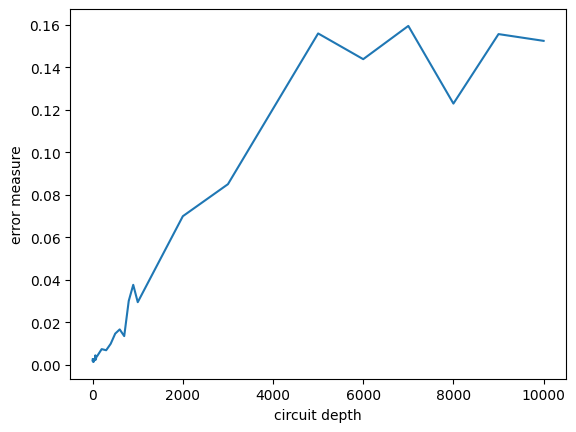

In [16]:
import matplotlib.pyplot as plt
lists = sorted(err.items())
x, y = zip(*lists)
plt.xlabel("circuit depth")
plt.ylabel("error measure")
plt.plot(x, y)

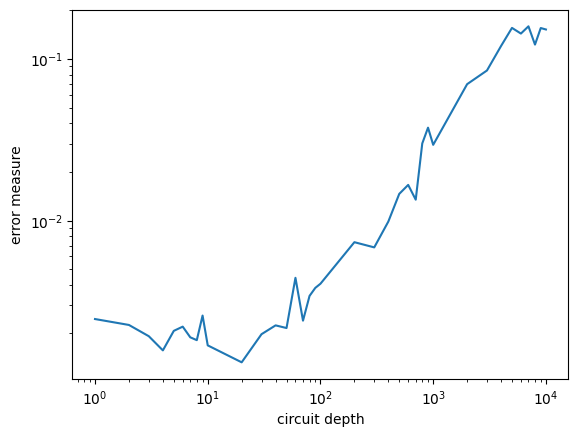

In [17]:
import matplotlib.pyplot as plt
lists = sorted(err.items())
x, y = zip(*lists)
plt.xlabel("circuit depth")
plt.ylabel("error measure")
plt.xscale('log')
plt.yscale('log')
plt.plot(x, y)